In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [0]:
x_data = np.linspace(0.1,10,1000000)
noise = np.random.randn(len(x_data))

In [3]:
x_data

array([ 0.1      ,  0.1000099,  0.1000198, ...,  9.9999802,  9.9999901,
       10.       ])

In [4]:
noise.shape

(1000000,)

In [5]:
noise

array([ 2.36449498, -0.94423392, -0.82888023, ...,  1.85926107,
       -0.04697305,  1.10997891])

y =mx+b<br>
 b=5

In [0]:
y_true = 0.5*x_data+5+noise

In [0]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data = y_true,columns=['Y'])


In [8]:
x_df.head()

,X Data
0,0.10000
1,0.10001
2,0.10002
3,0.10003
4,0.10004


In [9]:
y_df.head()

,Y
0,7.414495
1,4.105771
2,4.221130
3,4.926628
4,5.619121


In [0]:
my_data = pd.concat([x_df,y_df],axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.10000,7.414495
1,0.10001,4.105771
2,0.10002,4.221130
3,0.10003,4.926628
4,0.10004,5.619121


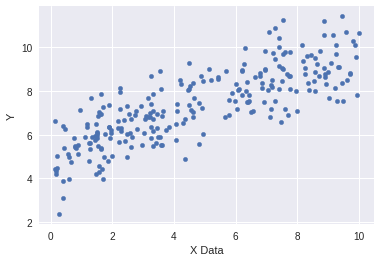

In [12]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [0]:
batch_size =8

In [14]:
np.random.randn(2)

array([1.3513405 , 0.62434522])

In [0]:
m= tf.Variable(0.96)
b = tf.Variable(0.63)

In [0]:
xph = tf.placeholder(tf.float32,[batch_size])

yph = tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m*xph+b


In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    batches =1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
        
    model_m,model_b =sess.run([m,b])

In [22]:
model_m

0.48779637

In [23]:
model_b

4.952863

In [0]:
y_hat = model_m*x_data+model_b

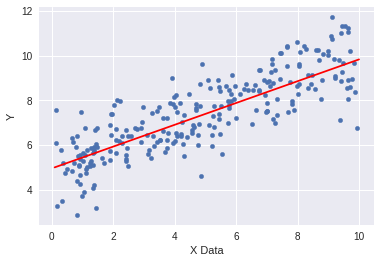

In [25]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

### tf.estimator have several types
- tf.estimator.LinearClassifier
   - Constructs a linear classification model 
- tf.estimator.LinearRegressor
    - Constructs a linear regresssion model
- tf.estimator.DNNClassifier 
    - Constructs a neural nework classification model
- tf.estimator.DNNRegressor
    - Constructs a neural nework regresssion model 
- tf.estimator.DNNLinearCombinedRegressor    
    - Constructs a neural nework and linear combined regresssion model 

In [0]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [27]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwpzemplo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fac03536f60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [39]:
print(x_train)

[6.86906247 5.70854371 4.03920404 ... 4.81732502 2.22393822 1.85221265]


In [40]:
print(x_train.shape)

(700000,)


In [41]:
print(y_eval.shape)

(300000,)


In [0]:
input_fun = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [47]:
estimator.train(input_fn=input_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpwpzemplo/model.ckpt.
INFO:tensorflow:loss = 513.32336, step = 1
INFO:tensorflow:global_step/sec: 441.83
INFO:tensorflow:loss = 12.88344, step = 101 (0.227 sec)
INFO:tensorflow:global_step/sec: 767.269
INFO:tensorflow:loss = 16.990599, step = 201 (0.132 sec)
INFO:tensorflow:global_step/sec: 721.37
INFO:tensorflow:loss = 18.672495, step = 301 (0.137 sec)
INFO:tensorflow:global_step/sec: 727.893
INFO:tensorflow:loss = 10.596423, step = 401 (0.137 sec)
INFO:tensorflow:global_step/sec: 689.655
INFO:tensorflow:loss = 11.927521, step = 501 (0.145 sec)
INFO:tensorflow:global_step/sec: 896.527
INFO:tensorflow:loss = 17.62879, step = 601 (0.111 sec)
INFO:tensorflow:global_step/sec: 769.076
INFO:tensorflow:loss

In [49]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-12:38:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwpzemplo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-01-12:38:38
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1177242, global_step = 1000, loss = 8.941793


In [50]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-12:39:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwpzemplo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-01-12:39:51
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1303159, global_step = 1000, loss = 9.042527


In [51]:
print("Training data metrics:")
print(train_metrics)

Training data metrics:
{'average_loss': 1.1177242, 'loss': 8.941793, 'global_step': 1000}


In [52]:
print("Eval data metrics")
print(eval_metrics)

Eval data metrics
{'average_loss': 1.1303159, 'loss': 9.042527, 'global_step': 1000}


In [0]:
 brand_new_data = np.linspace(0,10,10)
  

In [0]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [65]:
estimator.predict(input_fn=input_fn_predict)


<generator object Estimator.predict at 0x7fac01e823b8>

In [66]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwpzemplo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3260717], dtype=float32)},
 {'predictions': array([4.996821], dtype=float32)},
 {'predictions': array([5.66757], dtype=float32)},
 {'predictions': array([6.338319], dtype=float32)},
 {'predictions': array([7.0090685], dtype=float32)},
 {'predictions': array([7.679817], dtype=float32)},
 {'predictions': array([8.350566], dtype=float32)},
 {'predictions': array([9.021315], dtype=float32)},
 {'predictions': array([9.692064], dtype=float32)},
 {'predictions': array([10.362814], dtype=float32)}]

In [67]:
predictions =[]

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])
  

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwpzemplo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [68]:
predictions

[array([4.3260717], dtype=float32),
 array([4.996821], dtype=float32),
 array([5.66757], dtype=float32),
 array([6.338319], dtype=float32),
 array([7.0090685], dtype=float32),
 array([7.679817], dtype=float32),
 array([8.350566], dtype=float32),
 array([9.021315], dtype=float32),
 array([9.692064], dtype=float32),
 array([10.362814], dtype=float32)]

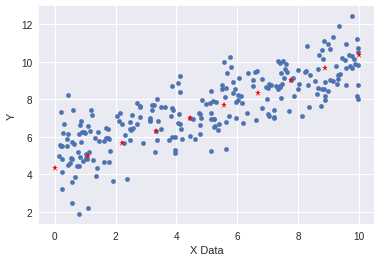

In [70]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,"r*")